# General Mixture Models

author: Jacob Schreiber <br>
contact: jmschreiber91@gmail.com

It is frequently the case that the data you have is not explained by a single underlying distribution. If we want to try to recover the underlying distributions, we need to have a model which has multiple components. An example is the following data.

In [29]:
from pomegranate import *
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([   3.,    3.,    6.,   16.,   15.,   34.,   26.,   30.,   24.,
          22.,   23.,   19.,   27.,   42.,  113.,  126.,  123.,   76.,
          18.,    4.]),
 array([ -5.52206835,  -4.67671553,  -3.8313627 ,  -2.98600988,
         -2.14065706,  -1.29530424,  -0.44995142,   0.3954014 ,
          1.24075422,   2.08610704,   2.93145986,   3.77681268,
          4.6221655 ,   5.46751832,   6.31287114,   7.15822396,
          8.00357678,   8.8489296 ,   9.69428242,  10.53963524,  11.38498806]),
 <a list of 20 Patch objects>)

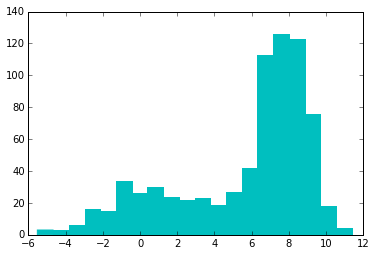

In [30]:
data = np.concatenate( (np.random.randn(250) * 2.75 + 1.25, np.random.randn(500) * 1.2 + 7.85) )
np.random.shuffle(data)
plt.hist( data, edgecolor='c', color='c', bins=20 )

We can create our initial estimate of what this distribution is a General Mixture Model. This is a model which is comprised of multiple distributions, and weights on those distributions representing the prior probability of a point falling under that distribution given no knowledge of the point itself (defaults to equal). We can have univariate mixture models by using univariate distributions, or multivariate distributions by using multivariate distributions.

## Gaussian Mixture Models

In [31]:
d = GeneralMixtureModel( [NormalDistribution(2.5, 1), NormalDistribution(8, 1)] )

We can now predict the class labels of each point under this mixture. 

In [32]:
labels = d.predict( data )
print labels[:5]
print "{} 1 labels, {} 0 labels".format( labels.sum(), labels.shape[0] - labels.sum() )

[0 1 1 1 1]
515 1 labels, 235 0 labels


This is fairly close to the number of underlying points from each distribution, off by 17 in each label. We still don't know if the labels are accurate, just the number of labels.

(array([ 17.,  14.,  13.,  29.,  34.,  49.,  60.,  35.,  49.,  51.,  38.,
         47.,  31.,  20.,  12.,   8.,   2.,   3.,   1.,   2.]),
 array([  5.26445893,   5.57048539,   5.87651184,   6.1825383 ,
          6.48856475,   6.79459121,   7.10061767,   7.40664412,
          7.71267058,   8.01869704,   8.32472349,   8.63074995,
          8.93677641,   9.24280286,   9.54882932,   9.85485578,
         10.16088223,  10.46690869,  10.77293515,  11.0789616 ,  11.38498806]),
 <a list of 20 Patch objects>)

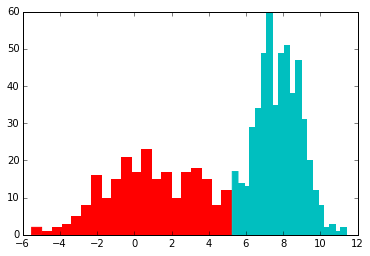

In [33]:
plt.hist( data[ labels == 0 ], edgecolor='r', color='r', bins=20 )
plt.hist( data[ labels == 1 ], edgecolor='c', color='c', bins=20 )

It is slightly more difficult to update the underlying components of the model because we don't have labels indicating which point came from which distribution. We could try to use the labels inferred from the model. It seems to cleanly split it, but what if our initial estimate was not very good? It could be difficult to get a good update if we had a bad prior. 

Another possibility is to predict the probability of each point under each component, to get a softer estimate of the labels. Lets take a look.

In [34]:
labels = d.predict_proba( data )
print labels[:5]
print labels.sum(axis=0)

[[  1.00000000e+00   4.70833167e-10]
 [  2.24133761e-06   9.99997759e-01]
 [  2.38646605e-06   9.99997614e-01]
 [  8.51940430e-07   9.99999148e-01]
 [  1.30712464e-05   9.99986929e-01]]
[ 239.39933451  510.60066549]


This is slightly closer to the truth, with 15.2 off instead of 17, around 10% closer.

This is the beginning of a common unsupervised training algorithm called <b>expectation maximization</b>. It has two steps, <b>expectation</b> and <b>maximization</b>. The <b>expectation</b> step involves what we just did--assigning weights based on the probability of each point being generated by each component. The next step, <b>maximization</b>, is maximizing the probability that the distribution generated these points but performing weighted MLE.

This process must be iterated until convergence. Sometimes this requires only a single update, but for overlapping distributions (such as this one) it can sometimes take many iterations.

In [35]:
d.fit( data, verbose=True )

Improvement: 752.303100426
Improvement: 1.12121719634
Improvement: 0.0607945373833


753.4851121595696

## Multivariate Gaussian Mixture Models

We can do the same with multivariate distributions just as easily.

In [36]:
mu = np.arange(5)
cov = np.eye(5)

mgs = [ MultivariateGaussianDistribution( mu*i, cov ) for i in range(5) ]
gmm = GeneralMixtureModel( mgs )

In [37]:
data = numpy.random.randn(1000, 5) * 5
for i in range(5):
    data[i::5] += np.arange(5)*i

Lets see how well some points fit under the mixture model.

In [38]:
for i in range(10):
    print "Point {}: logp {}".format( i, gmm.log_probability(data[i]) )

Point 0: logp -32.2208337571
Point 1: logp -74.2396029911
Point 2: logp -13.1461073517
Point 3: logp -98.9398743945
Point 4: logp -120.049894374
Point 5: logp -16.6816486963
Point 6: logp -42.4213250082
Point 7: logp -134.033559163
Point 8: logp -43.4193590546
Point 9: logp -49.2108645656


In [39]:
gmm.fit(data, verbose=True, stop_threshold=1)

Improvement: 44076.995506
Improvement: 26.1949576399
Improvement: 9.20000244805
Improvement: 4.97667231813
Improvement: 3.65165562198
Improvement: 3.29776999307
Improvement: 3.02443297406
Improvement: 2.57327565081
Improvement: 2.0645804113
Improvement: 1.66283026306
Improvement: 1.36771287423
Improvement: 1.13827103772
Improvement: 0.949413210701


44137.09708046816

Now lets see how well the previous points fit.

In [40]:
for i in range(10):
    print "Point {}: logp {}".format( i, gmm.log_probability(data[i]) )

Point 0: logp -14.3131023629
Point 1: logp -16.1933864445
Point 2: logp -13.5736850944
Point 3: logp -16.9505557456
Point 4: logp -18.2913914294
Point 5: logp -14.2573393662
Point 6: logp -14.607408047
Point 7: logp -18.664549595
Point 8: logp -15.3567315547
Point 9: logp -15.4597473515


Looks like they're being fit significantly better than before! Training works.

## Discrete Mixture Models

In addition to having general mixture models over continuous distributions, we can also have mixture models over discrete distributions. This is useful in many bioinformatics contexts, specifically sequence analysis. Lets use the toy analysis of trying to analyze CG island distribution.

The problem is the following; DNA is made up of long sequences the four canonical nucleotides, abbreviated 'A', 'C', 'G', and 'T'. These nucleotides are not distributed randomly, and there is significant amounts of structure in the sequence. A major field in bioinformatics is trying to interpret this structure. One structured element is the CG content, where the Cs and the Gs appear more commonly than in the background. If we want to try to determine CG percentages in these islands, we can use a mixture model.

In [41]:
d1 = DiscreteDistribution( {'A' : 0.25, 'C': 0.25, 'G' : 0.25, 'T': 0.25 } ) # Background
d2 = DiscreteDistribution( {'A' : 0.05, 'C': 0.45, 'G' : 0.45, 'T': 0.05 } ) # CG rich regions
gmm = GeneralMixtureModel( [d1, d2] )

In [42]:
seq = numpy.array(list('CGACATCTGACTACGGCGCGCCTACTACTTGATCGATACGGCGTCAGCGACGACGATGATCGGCATCAGTCACTAC'))
gmm.fit(seq)

3.4766541840931495

In [43]:
print gmm.distributions
print
print numpy.exp(gmm.weights)

[{
    "frozen" : false,
    "class" : "Distribution",
    "parameters" : [
        {
            "A" : 0.35000000000000009,
            "C" : 0.19999999999999993,
            "T" : 0.29166666666666674,
            "G" : 0.15833333333333327
        }
    ],
    "name" : "DiscreteDistribution"
}, {
    "frozen" : false,
    "class" : "Distribution",
    "parameters" : [
        {
            "A" : 0.090517241379310304,
            "C" : 0.46551724137931033,
            "T" : 0.075431034482758591,
            "G" : 0.36853448275862077
        }
    ],
    "name" : "DiscreteDistribution"
}]

[ 0.56390977  0.43609023]


Looks like in this case the concept was sound, that there many CG rich regions, but our initial estimates of the  percentages were off. We can use a GMM like the one above to both identify and study the composition of these regions at the same time, updating the parameters of the distributions using expectation-maximization. We will go into a more complex way of dong this using HMMs in the next tutorial.

## Concluding Remarks

General Mixture Models are extremely powerful tools for unsupervised learning. pomegranate makes it easy to define, fit, and make predictions using these models. All the examples above have used the same distribution type for all the components of the mixture, but that is not a requirement, if your application requires varied distributions.